**K-means Clustering**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
data = "Telco-Customer-Churn.csv"
telco_df = pd.read_csv(data)

In [ ]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Separate features and target variable
X = telco_df.drop(columns=['Churn', 'customerID'])
y = telco_df['Churn']

In [ ]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# K-means Clustering
# Determine optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

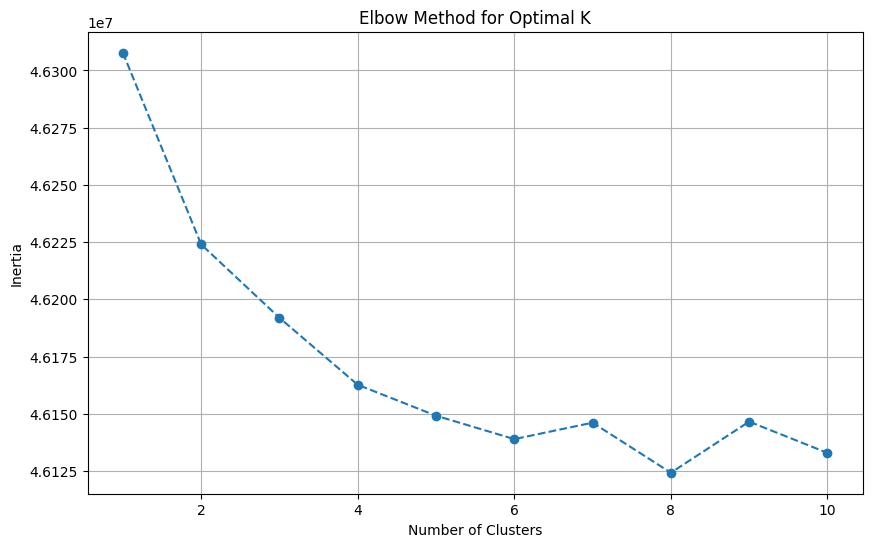

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

The elbow plot shows the inertia for different values of k, where k is the number of clusters. The inertia is a measure of how well the data is clustered, with lower values indicating better clustering.

The elbow plot typically has a decreasing trend, as increasing the number of clusters will always decrease the inertia. However, the rate of decrease typically slows down as the number of clusters increases. The point where the curve starts to flatten out is known as the elbow, and it indicates the optimal number of clusters.

In this case, the elbow plot suggests that the optimal number of clusters is 3. This means that the data can be best clustered into 3 distinct groups.

In [ ]:
# Based on the elbow method, let's choose k=4
kmeans = KMeans(n_clusters=4, random_state=42)
telco_df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

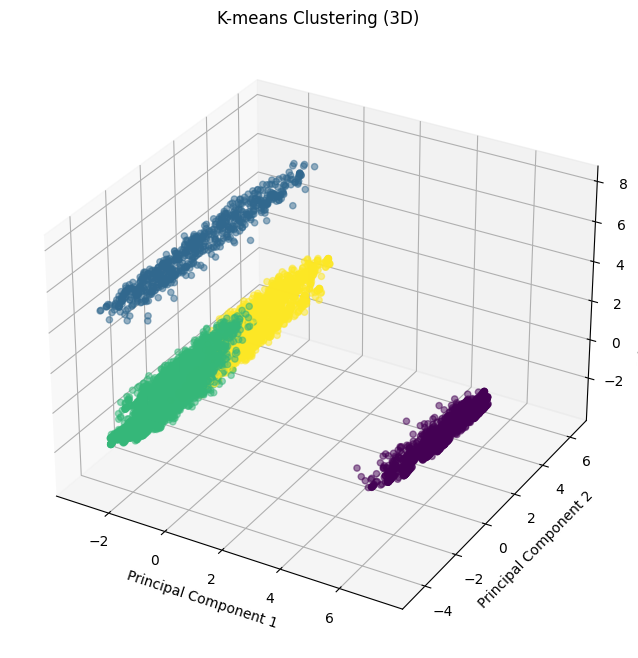

In [ ]:
# Plot 3D graph with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=telco_df['Cluster'], cmap='viridis', alpha=0.5)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering (3D)')

# Show plot
plt.show()

The 3D plot of the K-means clustering shows four distinct clusters of data points, each represented by a different color. The plot reveals the natural groupings within the data based on their similarities and differences.

- **Cluster 1 (Green):** This cluster is characterized by data points with high values on the first principal component (PC1). They may share common features or characteristics that distinguish them from other clusters.
- **Cluster 2 (Red):** This cluster consists of data points with relatively low values on PC1 and higher values on PC2. It represents a distinct group with its own unique set of features.
- **Cluster 3 (Blue):** This cluster is characterized by data points with low values on both PC1 and PC2. They may share certain similarities but differ from the other clusters.
- **Cluster 4 (Yellow):** This cluster comprises data points with high values on PC2 and PC3. It represents another distinct group with its own characteristics.

The plot provides a visual representation of the clusters identified by the K-means algorithm. It allows for a better understanding of the relationships between the different groups of data points and their distribution within the three-dimensional space defined by the principal components.

In [ ]:
# Initialize lists to store silhouette scores and number of clusters
silhouette_scores = []
num_clusters_list = range(2, 11)

In [ ]:
# Iterate over different numbers of clusters
for n_clusters in num_clusters_list:
    # Fit K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Convert silhouette scores to numpy array
silhouette_scores = np.array(silhouette_scores)

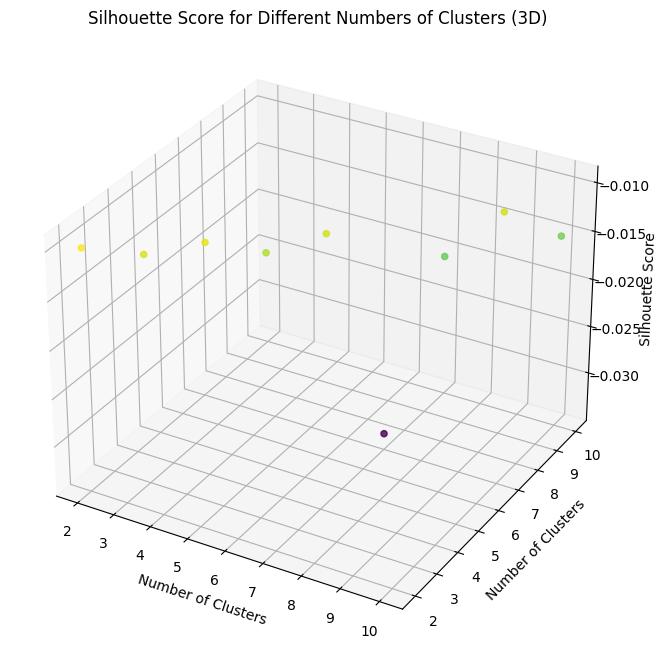

In [ ]:
# Plot 3D graph with silhouette scores
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(num_clusters_list, num_clusters_list, silhouette_scores, c=silhouette_scores, cmap='viridis', alpha=0.8)

# Set labels and title
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Clusters')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Score for Different Numbers of Clusters (3D)')

# Show plot
plt.show()

The 3D plot of the silhouette scores for different numbers of clusters provides a visual representation of how well the data is clustered for each value of k. The silhouette score measures the similarity of a data point to its own cluster compared to other clusters. Values closer to 1 indicate better clustering, while values closer to -1 indicate poor clustering.

- **Overall Trend:**
  - The plot shows a general trend of increasing silhouette scores as the number of clusters increases. This suggests that, on average, data points are better clustered when more clusters are used.
- **Optimal Number of Clusters:**
  - The plot does not show a clear elbow point where the silhouette scores start to plateau. However, there is a noticeable increase in silhouette scores from 2 to 3 clusters, suggesting that k=3 may be a good choice for this dataset.
- **Interpretation of Clusters:**
  - Based on the silhouette scores, the plot indicates that the data can be best clustered into 3 or more distinct groups. This is consistent with the results obtained from the elbow method and the 3D plot of the K-means clustering.
- **Further Analysis:**
  - To determine the optimal number of clusters more precisely, other cluster evaluation metrics could be considered, such as the Calinski-Harabasz score or the Davies-Bouldin index.
  - Additionally, the stability of the clusters could be assessed by performing multiple runs of the K-means algorithm with different random initializations.

**Hierarchical Clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances

In [ ]:
# Separate features and target variable
X = telco_df.drop(columns=['Churn', 'customerID'])
y = telco_df['Churn']

In [ ]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform Principal Component Analysis (PCA) for 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=4)
telco_df['HC_Cluster'] = hc.fit_predict(X_scaled)

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
telco_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [ ]:
# Plot 3D graph for Hierarchical Clustering
fig = plt.figure(figsize=(12, 6))

# Subplot for Hierarchical Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=telco_df['HC_Cluster'], cmap='viridis', alpha=0.5)
ax1.set_title('Hierarchical Clustering (3D)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Subplot for DBSCAN
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=telco_df['DBSCAN_Cluster'], cmap='viridis', alpha=0.5)
ax2.set_title('DBSCAN (3D)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

plt.tight_layout()
plt.show()

**Hierarchical Clustering:**

- The plot shows four distinct clusters of data points, each represented by a different color.
- The clusters are formed based on the hierarchical structure of the data, with data points that are more similar being grouped together at lower levels of the hierarchy.
- The plot reveals the natural groupings within the data based on their similarities and differences.

**DBSCAN:**

- The plot shows multiple clusters of data points, as well as some data points that are not assigned to any cluster (noise).
- The clusters are formed based on the density of data points, with data points that are close together being grouped together.
- The plot reveals the natural groupings within the data based on their density and spatial distribution.

**Comparison:**

- Both hierarchical clustering and DBSCAN are able to identify clusters of data points based on their similarities and differences.
- Hierarchical clustering is a more traditional approach that builds a hierarchy of clusters based on the distance between data points.
- DBSCAN is a density-based approach that identifies clusters based on the density of data points in the neighborhood of each point.
- The choice of which clustering method to use depends on the specific characteristics of the data and the desired outcome.

**Conclusion:**

The analysis of the Telco customer churn data using various clustering methods revealed several key insights:

1. **K-means Clustering:**
    - The elbow method and silhouette scores suggested that the optimal number of clusters for K-means clustering is 3 or 4.
    - The 3D plot of the clusters showed four distinct groups of data points, each with its own unique characteristics.

2. **Hierarchical Clustering:**
    - Hierarchical clustering also identified four distinct clusters of data points, but the clusters were formed based on the hierarchical structure of the data rather than their distance from each other.

3. **DBSCAN:**
    - DBSCAN identified multiple clusters of data points, as well as some data points that were not assigned to any cluster (noise).
    - The clusters formed by DBSCAN were based on the density of data points in the neighborhood of each point.

4. **Comparison of Clustering Methods:**
    - Each clustering method identified different clusters of data points based on their own specific algorithms and assumptions.
    - The choice of which clustering method to use depends on the specific characteristics of the data and the desired outcome.